## Lab 1: Brownian Motion ##



In [1]:
# Imports
import numpy as np
import scipy.stats as sci
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [ ]:
def box_muller(size, plot_dist=True):

    U1 = np.random.uniform(size=size)
    U2 = np.random.uniform(size=size)

    r = np.sqrt(-2 * np.log(U1))
    theta = 2*np.pi*U2

    X = r * np.cos(theta)
    Y = r * np.sin(theta)

    n_bins=50
    if plot_dist==True:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
        
        # x-normal
        temp_X = ax1.hist(X, bins=n_bins, density=True, facecolor="gray",alpha=0.5, edgecolor='black')
        mu, sigma = np.mean(X), np.std(X)
        x_range = np.linspace(X.min(), X.max(), 500)
        ax1.plot(x_range, sci.norm.pdf(x_range, mu, sigma), color='black',linestyle="--", lw=1, alpha=0.8)
        
        ax1.set_title("X~N(0,1)", fontsize=10)
        ax1.text(-3.5,0.45,s=f"$\mu$={np.mean(X):.3f}", fontsize=8)
        ax1.text(-3.5,0.4,s=f"$\sigma^{2}$={np.var(X):.3f}", fontsize=8)

        # y-normal
        temp_Y = ax2.hist(Y, bins=n_bins, density=True, facecolor="gray",alpha=0.5, edgecolor='black')
        mu, sigma = np.mean(Y), np.std(Y)
        y_range = np.linspace(Y.min(), Y.max(), 500)
        ax2.plot(y_range, sci.norm.pdf(y_range, mu, sigma), color='black',linestyle="--", lw=1, alpha=0.8)
        
        ax2.set_title("Y~N(0,1)", fontsize=10)
        ax2.text(-3.5,0.45,s=f"$\mu$={np.mean(Y):.3f}", fontsize=8)
        ax2.text(-3.5,0.4,s=f"$\sigma^{2}$={np.var(Y):.3f}", fontsize=8)

        x_line = np.linspace(temp_X[1][0], temp_X[1][-1], len(temp_X[1]))
        y_line = np.linspace(temp_Y[1][0], temp_Y[1][-1], len(temp_Y[1]))
        pdfX = sci.norm.pdf(x_line, 0, 1)
        pdfY = sci.norm.pdf(y_line, 0, 1)

        # lin-log x-norm
        temp = ax3.hist(X, bins=n_bins, density=True, facecolor="gray")
        ax3.set_yscale('log')
        ax3.set_title("lin-log X", fontsize=10)

        #lin-log y-norm
        temp = ax4.hist(Y, bins=n_bins, density=True, facecolor="gray")
        ax4.set_yscale('log')
        ax4.set_title("lin-log Y", fontsize=10)

        ax3.plot(x_line, pdfX, '--', color='black', lw=1)
        ax4.plot(y_line, pdfY, '--', color='black', lw=1)

        
        for ax in [ax1, ax2, ax3, ax4]:
            ax.tick_params(axis='x', labelsize=8)
            ax.tick_params(axis='y', labelsize=8)
            if ax==ax1 or ax==ax2:
                ax.set_xlim(-4,4)
            else:
                ax.set_xlim(-5,5)
            ax.set_ylim(0,0.5)
        plt.tight_layout()
        plt.show()
    
    # returns normals, box-muller samples
    print(f"X: mu = <{np.mean(X):.3f}> , var = {np.var(X):.3f}")
    print(f"X: mu = <{np.mean(Y):.3f}> , var = {np.var(Y):.3f}")
    return U1, U2, X, Y

In [ ]:
def periodic_boundary(x, y, L):
    # moved to main alg
    x_pbc = ((x + L/2) % L) - L/2
    y_pbc = ((y + L/2) % L) - L/2

    return x_pbc, y_pbc

In [ ]:
def euler_mayurama(g_x, g_y, Gamma=1, gamma=1, n_steps=1000, mod=False, L=4, origin=True, dt=0.01):
    dt = 1/n_steps
    t = np.arange(0, 1, dt)

    # (_x,_y):= position of particle at time t
    _x = np.zeros(len(t))
    _y = np.zeros(len(t))
    msd = np.zeros(len(t))

    # where to start from
    if origin==False: 
        _x[0] = np.random.uniform(-L/2,L/2)
        _y[0] = np.random.uniform(-L/2,L/2)

    for t in range(0, len(t)-1):
        # Select random x-jump and y-jump
        i = np.random.randint(0, len(g_x))
        j = np.random.randint(0, len(g_y))

        # update and check for boundary 
        _x[t+1] = _x[t] + (g_x[i]/gamma) * np.sqrt(2*Gamma*dt)
        _y[t+1] = _y[t] + (g_y[j]/gamma) * np.sqrt(2*Gamma*dt)
        if mod==True: 
            _x[t+1] = ((_x[t+1] + L/2) % L) - L/2
            _y[t+1] = ((_y[t+1] + L/2) % L) - L/2

    
    # Time-lag MSD
    for tau in range(1, t): 
        delta = (_x[tau:] - _x[:-tau])**2 + (_y[tau:] - _y[:-tau])**2
        msd[tau] = np.mean(delta)
        
    return _x, _y, msd

/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_6231/1052218926.py:64: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,0.5)


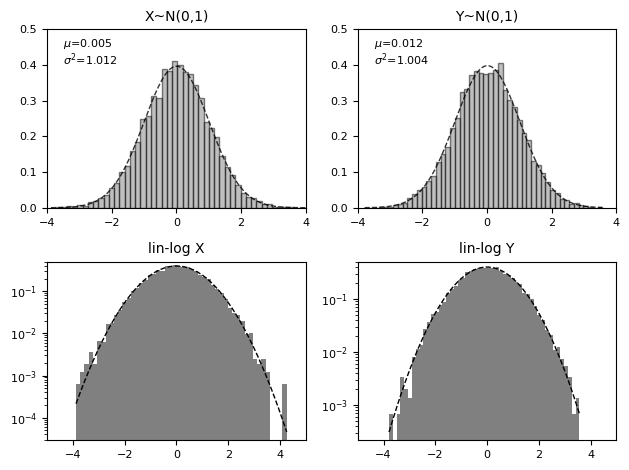

X: mu = <0.005> , var = 1.012
X: mu = <0.012> , var = 1.004


In [5]:
# Test distributions
N=10000
U1,U2,X,Y=box_muller(N, plot_dist=True)

X: mu = <-0.013> , var = 1.006
X: mu = <0.015> , var = 0.979


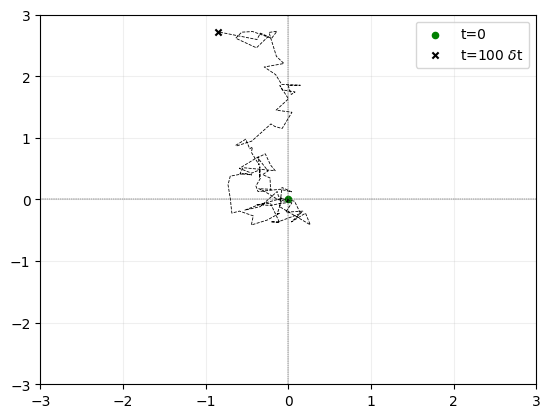

In [6]:
## SINGLE PARTICLE BROWNIAN MOTION ##
N=10000
plot_dist=False
x,y,g_x,g_y = box_muller(N, plot_dist)
Gamma=1
gamma=1
dt=0.001
n_steps=100
t = np.arange(0, 1+dt, dt)
for i in range(1):
    _x,_y, msd = euler_mayurama(g_x, g_y, Gamma, gamma, n_steps=n_steps, mod=False)
    
    #plt.text(_x[-1], _y[-1], color='black',s="End", fontsize=12)
    ls = "--" if i==0 else "--"
    plt.plot(_x,_y, color='black', linestyle=ls, linewidth="0.6")
    plt.scatter(_x[0], _y[0], color="g", s=20, marker='o', label="t=0")
    plt.scatter(_x[-1], _y[-1], color='black',marker='x', s=20,  label=f"t=100 $\delta$t")
#plt.text(_x[0], _y[0], color='g', s="t=0", fontsize=12)
plt.legend()
plt.axvline(x=0,color='black', linestyle='--', linewidth="0.3")
plt.axhline(y=0,color='black', linestyle='--', linewidth="0.3")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.grid(alpha=0.2)
plt.show()

In [ ]:
N=1000
plot_dist=False
x,y,g_x,g_y = box_muller(N, plot_dist)
Gamma=10
Gammas=[0.01, 0.1, 0.5, 1, 2, 10, 20, 50]
gamma=1

n_steps=100
n_particles=1000
particles=np.array([[0.0, 0.0, 0.0, 0.0, 0.0] for n in range(n_particles)]) #x0,y0,xf,yf,msd
particle_data = np.zeros((n_particles, n_steps, 2))
particle_data_unbounded = np.zeros((n_particles, n_steps, 2))
particle_msd = np.zeros((n_particles, n_steps))


L=100

for n in range(n_particles):
    _x,_y, msd = euler_mayurama(g_x, g_y, Gamma, gamma, n_steps, mod=False, L=L, origin=False)
    particle_data_unbounded[n, :, 0] = _x
    particle_data_unbounded[n, :, 1] = _y
    particle_msd[n]=msd

    _x,_y = periodic_boundary(_x, _y, L)

    particles[n]=[_x[1],_y[1],_x[-1], _y[-1],0.0]
    particle_data[n, :, 0] = _x
    particle_data[n, :, 1] = _y


X: mu = <-0.011> , var = 1.034
X: mu = <0.044> , var = 0.959


/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_6231/2127854366.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Grays')


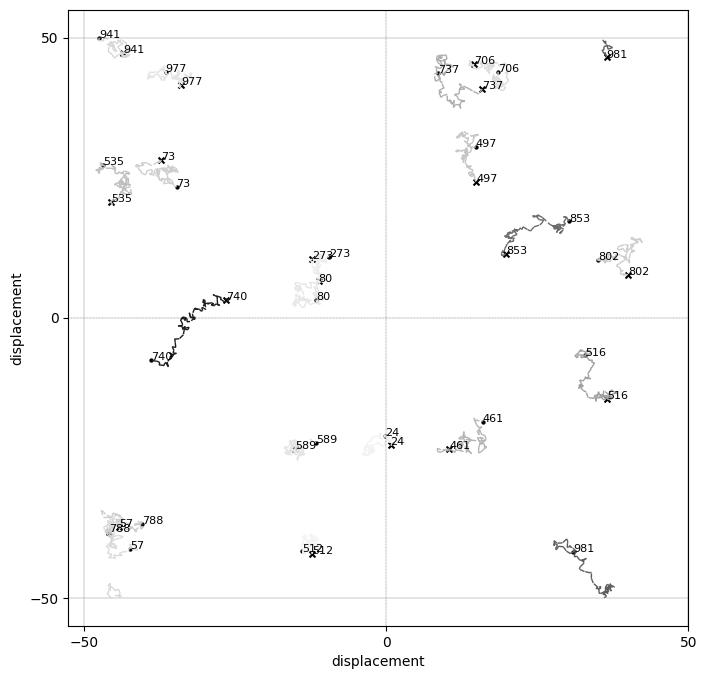

In [8]:

cmap = cm.get_cmap('Grays')

dt=1/n_steps
t = np.arange(0, 1+dt, dt)

# per particle
fig,ax=plt.subplots(figsize=(8,8))
# for graphics
net_disp = np.sqrt((particle_data_unbounded[:,n_steps-1,0]-particle_data_unbounded[:,0,0])**2 
                   + (particle_data_unbounded[:,n_steps-1,1]-particle_data_unbounded[:,0,1])**2)
max_msd=np.max(net_disp)

rand_sel = np.random.randint(1, n_particles, size=20)
for _,n in enumerate(rand_sel):
    colormap = net_disp[n] / max_msd
    color_msd = cmap(colormap) #msd
    for i in range(n_steps - 1):
        x1, x2 = particle_data[n][i][0], particle_data[n][i + 1][0]
        y1, y2 = particle_data[n][i][1], particle_data[n][i + 1][1]
        dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if dist <= (L/2) - 0.001:
            plt.plot([x1, x2], [y1, y2], 
                     color=color_msd, 
                     linewidth=1, 
                     linestyle="--")
    
    plt.text(particle_data[n][0][0], particle_data[n][0][1], color='black', s=n, fontsize=8)
    plt.scatter(particle_data[n][0][0], particle_data[n][0][1], color="black", marker='x',s=18)

    plt.text(particle_data[n][-1][0], particle_data[n][-1][1], color='black', s=n, fontsize=8)
    plt.scatter(particle_data[n][-1][0], particle_data[n][-1][1], color="black", marker='.',s=18)

# (0,0) and Boundary Lines #
plt.axvline(x=0,color='black', linestyle='--', linewidth="0.2")
plt.axhline(y=0,color='black', linestyle='--', linewidth="0.2")
plt.xlabel("displacement")
plt.ylabel("displacement")
plt.xticks([-L/2,0,L/2])
plt.yticks([-L/2,0,L/2])

plt.axvline(-L/2, color='gray', lw=0.3)
plt.axvline(L/2, color='gray', lw=0.3)
plt.axhline(-L/2, color='gray', lw=0.3)
plt.axhline(L/2, color='gray', lw=0.3)

plt.show()

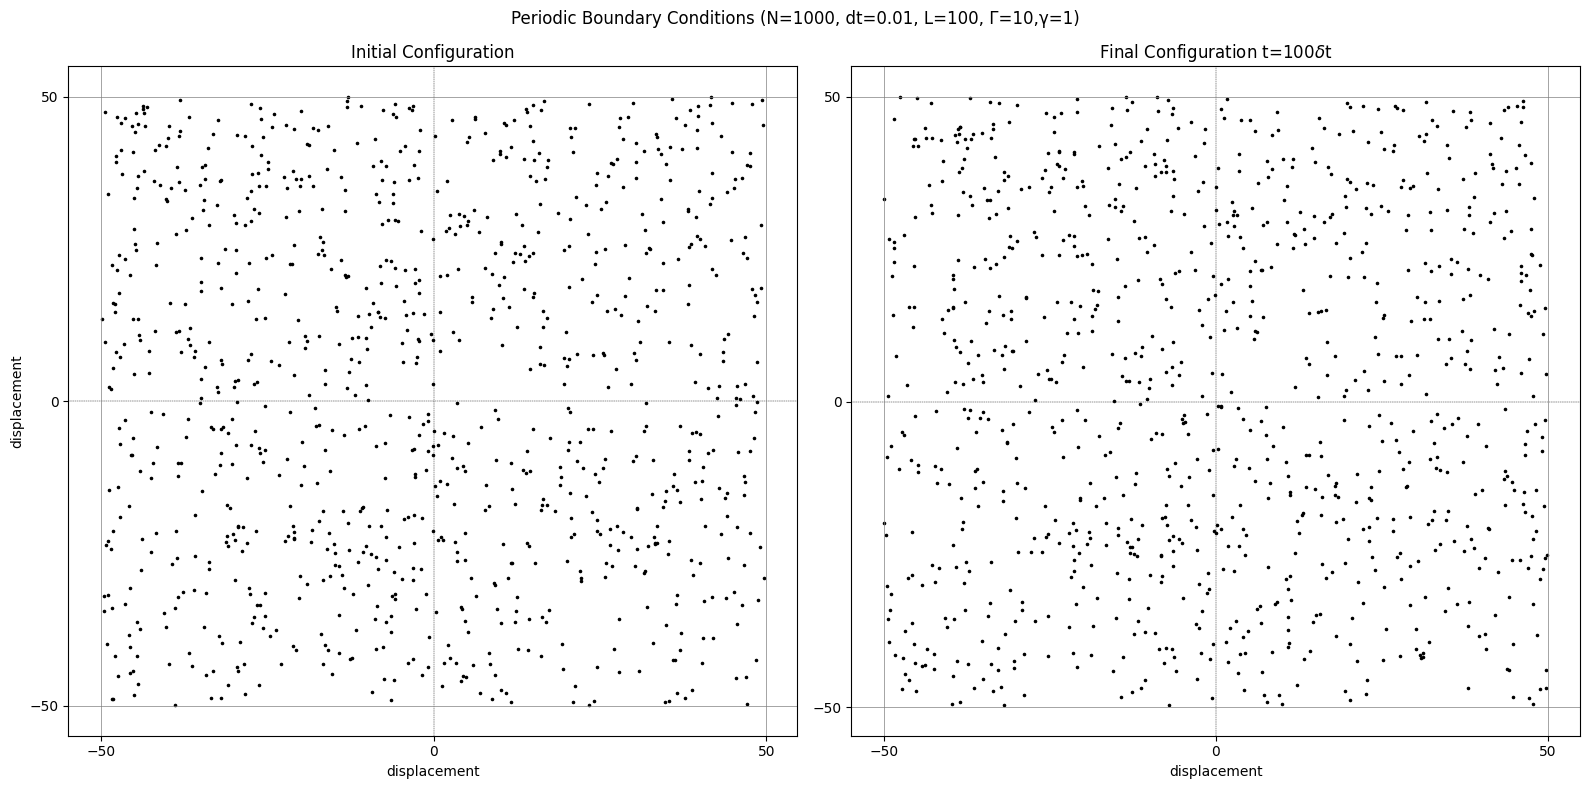

In [ ]:
# start and finish configurations
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))

colormap = net_disp[n] / max_msd
color_msd = cmap(colormap) #msd
norm = plt.Normalize(vmin=0, vmax=max_msd)
point_colors=plt.cm.Grays


ax1.scatter(particle_data[:,0,0], particle_data[:,0,1], color="black", marker='.',s=10)

size_min,size_max=10,200
sizes = size_min + (size_max - size_min) * (net_disp / max_msd)

_ax2=ax2.scatter(particle_data[:,-1,0], particle_data[:,-1,1], color="black", marker='.',s=10)
for _ax in (ax1,ax2):
    _ax.axvline(x=0,color='black', linestyle='--', linewidth="0.3")
    _ax.axhline(y=0,color='black', linestyle='--', linewidth="0.3")

    _ax.axvline(-L/2, color='gray', lw=0.5)
    _ax.axvline(L/2, color='gray', lw=0.5)
    _ax.axhline(-L/2, color='gray', lw=0.5)
    _ax.axhline(L/2, color='gray', lw=0.5)
    _ax.set_xticks([-L/2,0,L/2])
    _ax.set_yticks([-L/2,0,L/2])
    _ax.set_xlabel("displacement")
    _ax.set_ylabel("displacement")
ax1.set_title("Initial Configuration")
ax2.set_ylabel("")
ax2.set_title(f"Final Configuration t={n_steps}$\delta$t")
plt.suptitle(f'Periodic Boundary Conditions (N={n_particles}, dt={dt}, L={L}, Γ={Gamma},γ={gamma})')
plt.tight_layout()
plt.show()

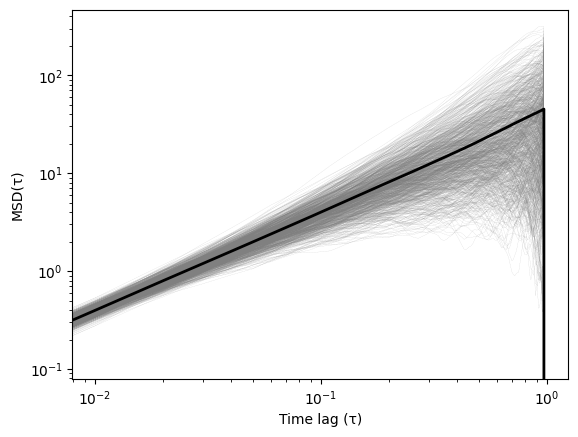

In [ ]:
# time lag v msd
t = np.arange(0, 1, dt)
for _, _msd in enumerate(particle_msd):
    plt.loglog(t, _msd,
               color='gray', linewidth=0.1, linestyle="--", alpha=0.8)
plt.loglog(t,np.mean(particle_msd, axis=0), linewidth=2, color='black')

plt.xlabel("Time lag (τ)")
plt.ylabel("MSD(τ)")
plt.show()


In [ ]:
# generate for all gammas
full_particle_msd=np.zeros((len(Gammas), n_particles, n_steps))
for g in range(len(Gammas)):
    for n in range(n_particles):
        _x,_y, msd = euler_mayurama(g_x, g_y, Gammas[g], gamma, n_steps, mod=False, L=L, origin=False)
        particle_data_unbounded[n, :, 0] = _x
        particle_data_unbounded[n, :, 1] = _y
        particle_msd[n]=msd
        full_particle_msd[g][n]=msd

        _x,_y = periodic_boundary(_x, _y, L)

        particles[n]=[_x[1],_y[1],_x[-1], _y[-1],0.0]
        particle_data[n, :, 0] = _x
        particle_data[n, :, 1] = _y


In [12]:
print(full_particle_msd.shape)
print("MSD min/max:", full_particle_msd.min(), full_particle_msd.max())

(8, 1000, 100)
MSD min/max: 0.0 1524.6802846425726


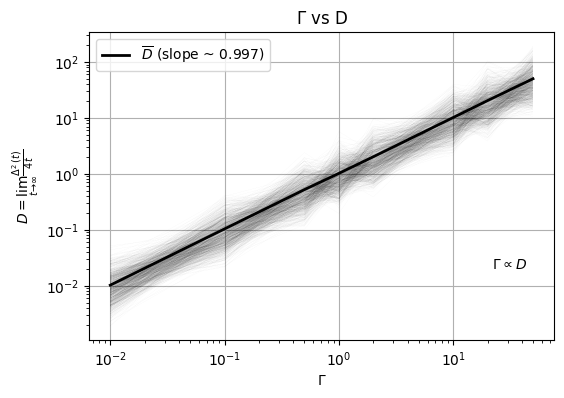

In [ ]:
dt=1/n_steps
t = np.arange(0, 1, dt)
particle_mean_msd = np.mean(particle_msd)
D_values=[]
mean_D_per_Gamma=[]
plt.figure(figsize=(6,4))

for g in range(len(Gammas)):
    # take MSD at final time step
    D_g = full_particle_msd[g,:,1:] / (4 * t[1:])
    D_values.append(D_g)
    mean_D_per_Gamma.append(np.mean(D_g))

D_values = np.array(D_values)
mean_D_per_Gamma=np.array(mean_D_per_Gamma)

log_G = np.log10(Gammas)
log_D = np.log10(mean_D_per_Gamma)
slope, intercept = np.polyfit(log_G, log_D, 1)

# plot Gamma vs D in log-log scale

plt.loglog(Gammas, np.mean(D_values, axis=2), '--', linewidth=0.1, alpha=0.1, color='black')
plt.loglog(Gammas, mean_D_per_Gamma, '-', color='black', linewidth=2, label=f'$\overline{{D}}$ (slope ~ {slope:.3f})')
plt.text(22,0.02, "$\Gamma \propto D$")
plt.legend(loc='upper left', fontsize=10)
plt.xlabel(f"$\Gamma$")
plt.ylabel(r"$D = \lim_{t \to \infty} \frac{\Delta^2(t)}{4 t}$")
plt.title("$\Gamma$ vs D")
plt.grid(True, which='major')
plt.show()
